# Tâche 7

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mp_api.client import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.core import Spin

In [3]:
mp_key = "0xG7dCsc4AADF0PgqeiDeWIJa0gtg1Pd"
mp_id = "mp-9166"

In [4]:
with MPRester(mp_key) as m:
    struct = m.get_structure_by_material_id(mp_id)
    band_structure= m.get_bandstructure_by_material_id(mp_id)


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Bande interdite


In [154]:
band_gap = band_structure.get_band_gap()
print(f"Bande interdite {band_gap}:")
y = band_structure.is_metal()
print(f"matériau = métaux: {y}")

Bande interdite {'direct': False, 'energy': 3.7571, 'transition': 'Z-L'}:
matériau = métaux: False


## Structure de bande electronique du MgCN2

Indirect Z-L bandgap = 3.7571
False


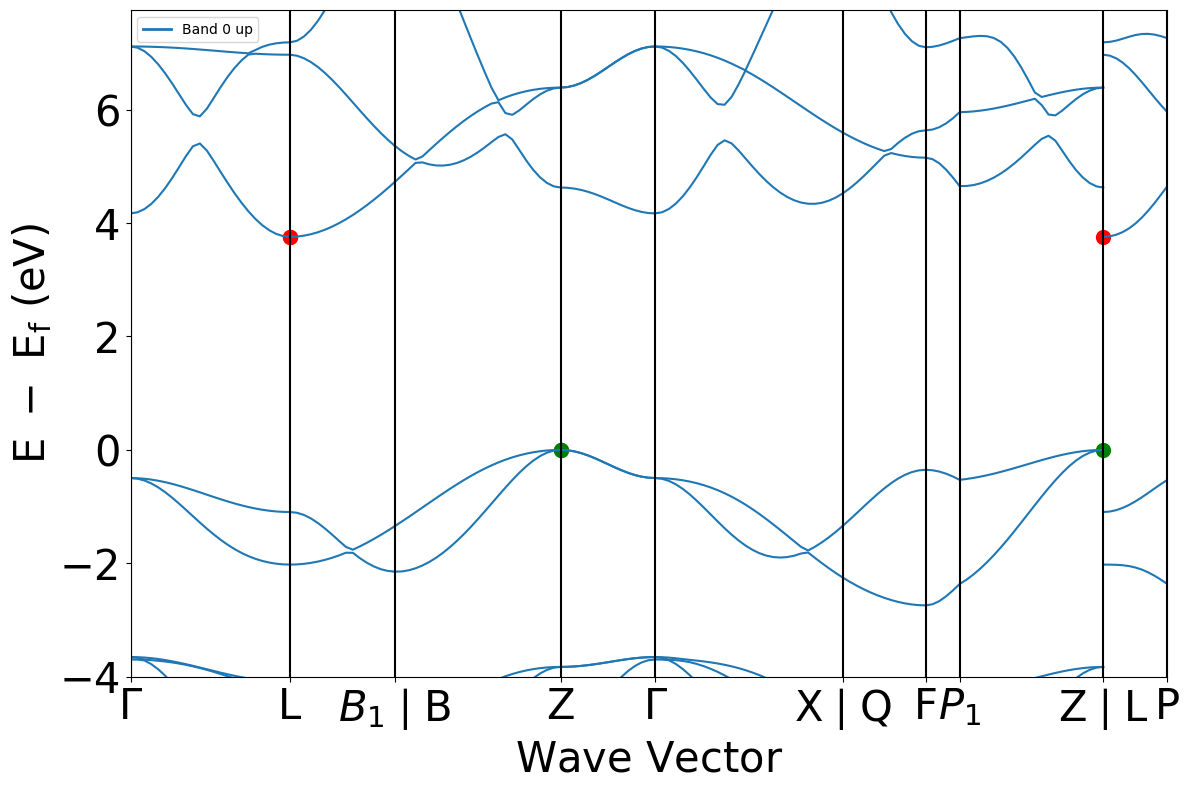

In [41]:
fig = BSPlotter(band_structure)
fig.get_plot(vbm_cbm_marker=True)
data = fig.bs_plot_data()
x = data['band_gap']
print(x)


## Loi de dispersion

In [151]:
# Recupération de l'indice de la première bande de conduction et de la dernière bande de valence
## dernière première bande de conduction présente 
cbm = band_structure.get_cbm()['band_index'][Spin.up][-1]
## première derniere bande de valence présente : 
vbm = band_structure.get_vbm()['band_index'][Spin.up][-1]

print(f"l'indice de la première bande de conduction est {cbm} et l'indice de la dernière bande de valence est {vbm}")


l'indice de la première bande de conduction est 11 et l'indice de la dernière bande de valence est 10


In [170]:
bs = BSPlotter(band_structure)
data = bs.bs_plot_data()
energy = data['energy']
print(len (energy["1"]))
distances = data['distances']
print(len(distances))
Dict = {}
pente_max = 0 #
pente_min = 1e6
Dict['Dy_cbm'] = {}
Dict['Dy_vbm'] =  {}
Dict['Dy_vbm'][1] = pente_max
Dict['Dy_cbm'][1] =pente_max
Dict['Dy_cbm'][0] = pente_min
Dict['Dy_vbm'][0] = pente_min


## calcule des pentes 
##calcule des dx
list_cond =[]
list_val = []
for i in range (len(distances)):
    dx= distances[i][0]-distances[i][-1]
    if(dx ==0): 
        continue
    ## calcule des dy(énergie)
    Dy_cbm = energy['1'][i][cbm][0] - energy['1'][i][cbm][-1]
    Dy_vbm =energy['1'][i][vbm][0] - energy['1'][i][vbm][-1]
    cond =  abs(Dy_cbm/dx)
    val = abs(Dy_vbm/dx)
    Dict['Dy_vbm'][1] = max(Dict['Dy_vbm'][1],val)   
    Dict['Dy_cbm'][1]= max(Dict['Dy_cbm'][1],cond)
    Dict['Dy_vbm'][0] = min(Dict['Dy_vbm'][0],val)
    Dict['Dy_cbm'][0]=  min(Dict['Dy_cbm'][0], cond)
    list_cond.append(cond)
    list_val.append(val)

print(f"La dispersion maximale en valeur absolue pour la bande de valence est {Dict['Dy_vbm'][1]}/ indice ={list_val.index(Dict['Dy_vbm'][1])} ")
print(f"La dispersion minimal en valeur absolue pour la bande de valence est {Dict['Dy_vbm'][0]}/ indice ={list_val.index(Dict['Dy_vbm'][0])} ")
print(f"La dispersion maximale en valeur absolue pour la bande de conduction est {Dict['Dy_cbm'][1]}/ indice ={list_cond.index(Dict['Dy_cbm'][1])}")
print(f"La dispersion minimale en valeur absolue pour la bande de conduction est {Dict['Dy_cbm'][0]}/ indice = {list_cond.index(Dict['Dy_cbm'][0])}")

M_val = list_val.index(Dict['Dy_vbm'][1])
m_val =  list_val.index(Dict['Dy_vbm'][0])
m_cond =list_cond.index(Dict['Dy_cbm'][0]) 
M_cond = list_cond.index(Dict['Dy_cbm'][1])

    
    
    
    










9
9
La dispersion maximale en valeur absolue pour la bande de valence est 1.6966660264168811/ indice =5 
La dispersion minimal en valeur absolue pour la bande de valence est 0.3383755733467578/ indice =1 
La dispersion maximale en valeur absolue pour la bande de conduction est 2.098275759672638/ indice =6
La dispersion minimale en valeur absolue pour la bande de conduction est 0.025368750876842986/ indice = 7


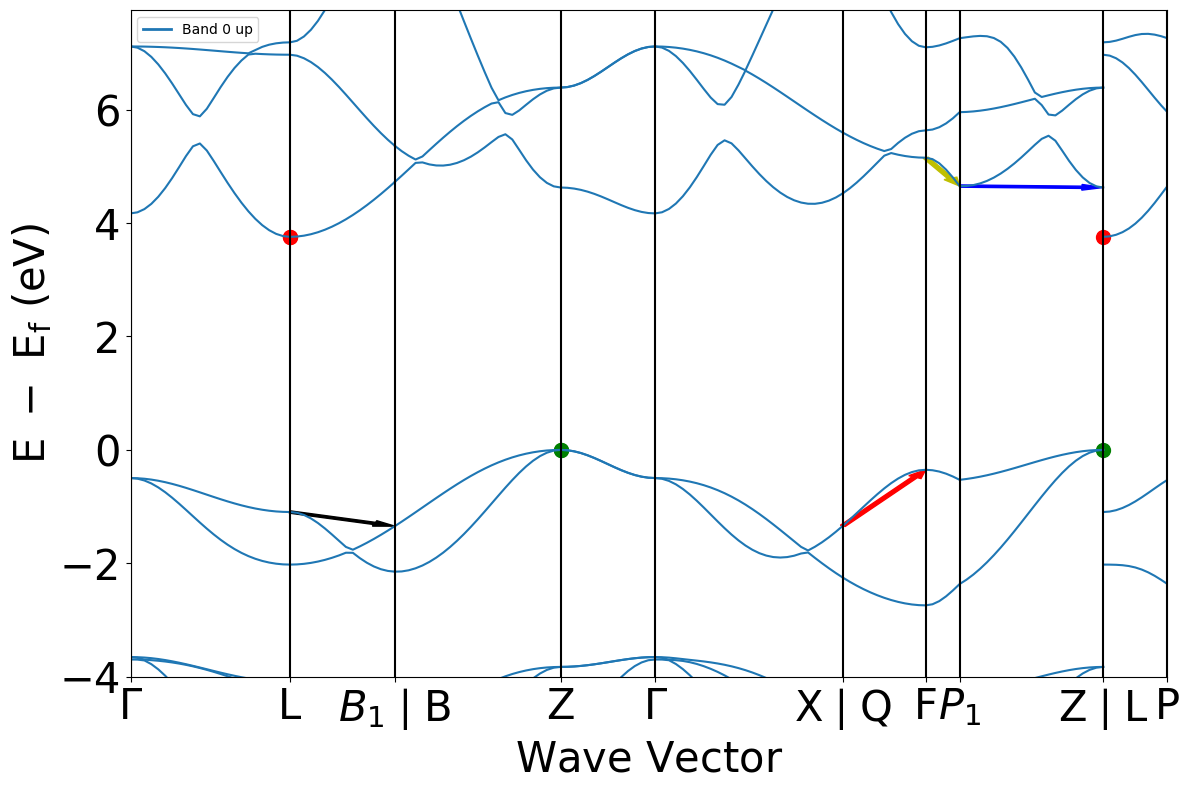

In [178]:
bs.get_plot(vbm_cbm_marker = True)
plt.arrow(distances[m_cond][0],energy['1'][m_cond][cbm][0], 
          distances[m_cond][-1]-distances[m_cond][0], energy['1'][m_cond][cbm][-1]-energy['1'][m_cond][cbm][0],
          width = 0.04,head_width=0.10,length_includes_head=True,color='blue')
plt.arrow(distances[M_cond][0], energy['1'][M_cond][cbm][0], 
          distances[M_cond][-1]-distances[M_cond][0], energy['1'][M_cond][cbm][-1]-energy['1'][cond_max][cbm][0],
          width = 0.04,head_width=0.10,length_includes_head=True,color='y')
plt.arrow(distances[list_val.index(Dict['Dy_vbm'][0])][0], energy['1'][list_val.index(Dict['Dy_vbm'][0])][vbm][0], 
          distances[list_val.index(Dict['Dy_vbm'][0])][-1]-distances[list_val.index(Dict['Dy_vbm'][0])][0], energy['1'][list_val.index(Dict['Dy_vbm'][0])][vbm][-1]-energy['1'][list_val.index(Dict['Dy_vbm'][0])][vbm][0],
          width = 0.04,head_width=0.10,length_includes_head=True,color='black') 

plt.arrow(distances[M_val][0], energy['1'][M_val][vbm][0], 
          distances[M_val][-1]-distances[M_val][0], energy['1'][M_val][vbm][-1]-energy['1'][M_val][vbm][0],
          width = 0.04,head_width=0.10,length_includes_head=True,color='red') 






## Masse effective

Comme vu au cours, il est souvent plus pertinent de modéliser les électrons dans un solide comme des particules libres, mais dont la masse effective varie en fonction de leur environnement cristallin, plutôt que comme des particules de masse fixe m évoluant dans un potentiel périodique. Cette masse effective peut être différente de la masse réelle de l’électron, et dans certains cas, elle peut même devenir négative ou quasi nulle.

Pour estimer la masse effective des électrons au sommet de la bande de valence et à la base de la bande de conduction, nous allons supposer que la relation dispersion énergie-vecteur d’onde est parabolique. En d'autres termes, on approxime l’énergie en fonction de k (le vecteur d'onde associé par une parabole :\begin{equation}
E(\vec{k}) = \frac{\hbar^2 \vec{k}^2}{2 m^*}
\end{equation}

In [137]:
## valeurs
eV = 1.602e-19 # J
A = 1e-10# angstrom Å en mètres
h_b = 1.054571817e-34 # J-s Reduced Planck constant = h/ 2pi avec h = 6.626 e-34

In [144]:
#1er cas : calcule masse effective pour la dernière bande de valence présente
VBM = band_structure.get_vbm()
## vecteur d'onde associé K
K = VBM['kpoint'].frac_coords
## nous avons besoin de la norme du vecteur d'onde  mais comme on va utiliser K^2 on peut simplement utiliser le pds
pds = np.dot(K,K)
K_norme = pds
## Energie associé à la bande de valence
E_k = VBM['energy']
## multiplie par eV car pas encore en S.I
E_k =(E_k) * eV





m_etoiles = (h_b**2 *K_norme)/(2*E_k)
print(f"la masse effective au sommet de la dernière bande de valence est de {m_etoiles} Kg")

## calcule de la masse effective de la première bande de conduction presente
CBM = band_structure.get_cbm()
K = CBM['kpoint'].frac_coords
K_norme = np.dot(K,K)
E_k = (CBM['energy'])*eV
m_etoiles = (h_b**2 *K_norme)/(2*E_k)
print(f"la masse effective au début de la première bande de conduction est de {m_etoiles} Kg")


la masse effective au sommet de la dernière bande de valence est de 1.1819664804749045e-50 Kg
la masse effective au début de la première bande de conduction est de 1.4560715334619647e-51 Kg
